In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, ReLU
from tensorflow.keras.datasets import mnist


In [29]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


1) **Without Batch Normalization**

In [30]:
model_no_bn = Sequential()

# Flatten 28x28 image to 1D
model_no_bn.add(Flatten(input_shape=(28, 28)))

# Hidden layers
model_no_bn.add(Dense(128))
model_no_bn.add(ReLU())

model_no_bn.add(Dense(64))
model_no_bn.add(ReLU())

# Output layer (10 classes)
model_no_bn.add(Dense(10, activation='softmax'))

model_no_bn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_no_bn.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Took 30 minutes
history_no_bn = model_no_bn.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8656 - loss: 0.4595 - val_accuracy: 0.9637 - val_loss: 0.1259
Epoch 2/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9658 - loss: 0.1128 - val_accuracy: 0.9717 - val_loss: 0.0886
Epoch 3/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9774 - loss: 0.0735 - val_accuracy: 0.9765 - val_loss: 0.0789
Epoch 4/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0540 - val_accuracy: 0.9755 - val_loss: 0.0832
Epoch 5/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9865 - loss: 0.0424 - val_accuracy: 0.9765 - val_loss: 0.0819
Epoch 6/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9885 - loss: 0.0355 - val_accuracy: 0.9752 - val_loss: 0.0919
Epoch 7/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9778 - val_loss: 0.0922
Epoch 8/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9925 - loss: 0

In [32]:
test_loss_no_bn, test_acc_no_bn = model_no_bn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy WITHOUT BatchNorm:", test_acc_no_bn)


Test Accuracy WITHOUT BatchNorm: 0.9804999828338623


2) **With Batch Normalization**

In [33]:
model_bn = Sequential()

# Flatten layer
model_bn.add(Flatten(input_shape=(28, 28)))

# Hidden layer 1
model_bn.add(Dense(128))
model_bn.add(BatchNormalization())
model_bn.add(ReLU())

# Hidden layer 2
model_bn.add(Dense(64))
model_bn.add(BatchNormalization())
model_bn.add(ReLU())

# Output layer
model_bn.add(Dense(10, activation='softmax'))

model_bn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_bn.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [34]:
# Took 30 minutes
history_bn = model_bn.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8707 - loss: 0.4510 - val_accuracy: 0.9687 - val_loss: 0.0992
Epoch 2/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9630 - loss: 0.1214 - val_accuracy: 0.9712 - val_loss: 0.0884
Epoch 3/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9746 - loss: 0.0824 - val_accuracy: 0.9777 - val_loss: 0.0770
Epoch 4/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9792 - loss: 0.0683 - val_accuracy: 0.9798 - val_loss: 0.0716
Epoch 5/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9808 - loss: 0.0582 - val_accuracy: 0.9783 - val_loss: 0.0757
Epoch 6/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9843 - loss: 0.0485 - val_accuracy: 0.9780 - val_loss: 0.0844
Epoch 7/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9851 - loss: 0.0465 - val_accuracy: 0.9818 - val_loss: 0.0704
Epoch 8/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9878 - loss: 

In [35]:
test_loss_bn, test_acc_bn = model_bn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy WITH BatchNorm:", test_acc_bn)


Test Accuracy WITH BatchNorm: 0.9829000234603882


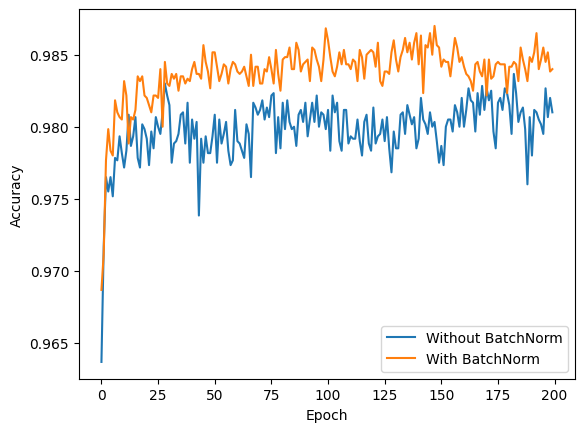

In [38]:
import matplotlib.pyplot as plt

plt.plot(history_no_bn.history['val_accuracy'], label='Without BatchNorm')
plt.plot(history_bn.history['val_accuracy'], label='With BatchNorm')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Accuracy went up with BN**

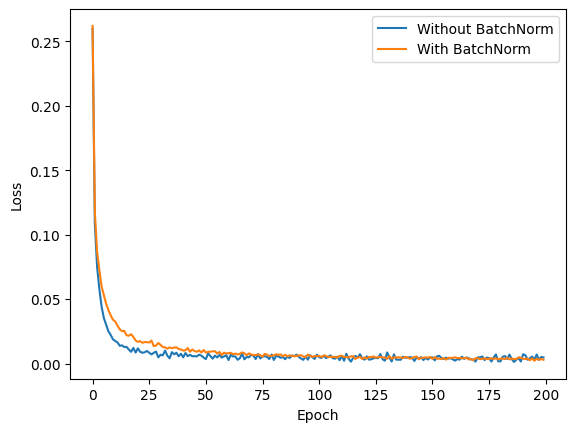

In [37]:
import matplotlib.pyplot as plt

plt.plot(history_no_bn.history['loss'], label='Without BatchNorm')
plt.plot(history_bn.history['loss'], label='With BatchNorm')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
# Save model WITHOUT BatchNorm
model_no_bn.save("mnist_no_batchnorm.keras")

# Save model WITH BatchNorm
model_bn.save("mnist_with_batchnorm.keras")


In [ ]:
from tensorflow.keras.models import load_model

model_no_bn = load_model("mnist_no_batchnorm.keras")
model_bn = load_model("mnist_with_batchnorm.keras")
